In [1]:
source("../functions.R")

Loading required package: ggplot2

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: Matrix


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
library(arrow)

See arrow_info() for available features


Attaching package: 'arrow'


The following objects are masked from 'package:feather':

    read_feather, write_feather


The following object is masked from 'package:utils':

    timestamp




In [3]:
name = 'treg_ln2'
rawfile = 'allcellsall.feather'

 normdata = read_feather(paste0(name, ".feather")) %>% as.data.frame()
    message("reading in raw data")
    rawdata = read_feather(rawfile) %>% as.data.frame()
    rownames(rawdata) = rawdata$Gene
    id = which(colnames(rawdata) == "Gene")
    rawdata = rawdata[, -id]
    rawdata = rawdata[, colnames(rawdata) %in% colnames(normdata)]
    metadata = read.csv(paste0(name, "_meta.txt"), row.names = 1, 
        stringsAsFactors = FALSE)
    seurat = CreateSeuratObject(rawdata)
    seurat@meta.data = metadata
    seurat

reading in raw data



An object of class seurat in project SeuratProject 
 14458 genes across 17387 samples.

In [4]:
seurat = pyProcess(seurat)

Regressing out: n_genes




Time Elapsed:  56.9281599521637 secs

Scaling data matrix

Warning message:
"Python 'C:\Users\dmorgan\AppData\Local\Continuum\anaconda3\envs\seqwell\python.exe' was requested but 'C:/Users/dmorgan/AppData/Local/r-miniconda/envs/r-reticulate/python.exe' was loaded instead (see reticulate::py_config() for more information)"


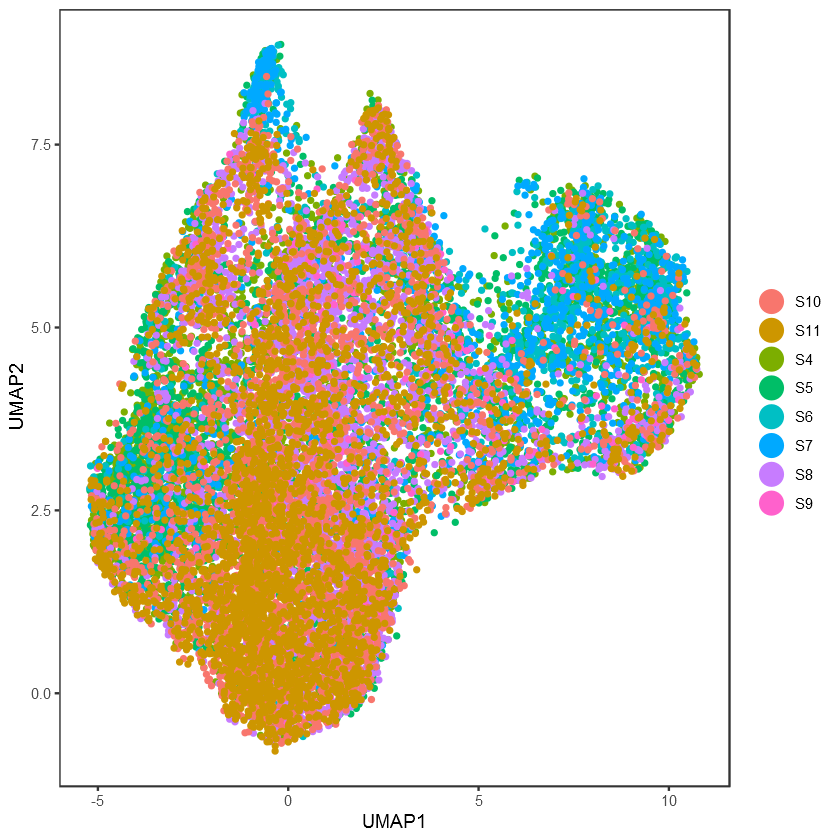

In [5]:
DimPlot(seurat, 'umap')

In [6]:
saveRDS(seurat, 'ln_seurat.RDS')